In [24]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Flatten,Dense,Dropout
from keras.layers.convolutional import Convolution2D,MaxPooling2D,ZeroPadding2D
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import cv2

In [2]:
df = pd.read_csv('E:/Backup/Project/Machine Learning/Emotion Detection/fer2013.csv')

In [5]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
x_train,train_y,x_test,test_y = [],[],[],[]

In [4]:
for index,row in df.iterrows():
    val = row['pixels'].split(' ')
    try:
        if 'Training' in row['Usage']:
            x_train.append(np.array(val,'float32'))
            train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
            x_test.append(np.array(val,'float32'))
            test_y.append(row['emotion'])
    except:
        print(f'Error occured at index:{index} and row: {row}')

In [5]:
x_train = np.array(x_train,'float32')
train_y = np.array(train_y,'float32')
x_test = np.array(x_test,'float32')
test_y = np.array(test_y,'float32')

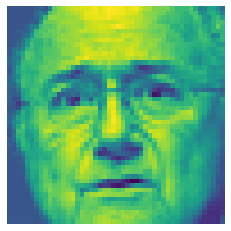

Emotion:  Fear


In [37]:
ii = 5
test_image = x_train[ii]
test_image = np.reshape(test_image, (48,48,1))
plt.imshow(test_image)
plt.axis('off')
plt.show()
emotion_detection = ['Angry','Disgust','Fear','Happy','Sad','Suprise','Neutral']
print('Emotion: ',emotion_detection[train_y[ii]])

In [6]:
# setting variables for train
num_features = 64
num_labels = 7
batch_size = 64
epochs = 50
width,height = 48,48

In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
train_y = to_categorical(train_y,num_classes=num_labels)
test_y = to_categorical(test_y,num_classes=num_labels)

In [9]:
x_train.shape

(28709, 2304)

In [10]:
# cannot produce
# normalizing data between 0 and 1
x_train -= np.mean(x_train,axis=0)
x_train /= np.std(x_train,axis=0)

x_test -= np.mean(x_test,axis=0)
x_test /= np.std(x_test,axis=0)

x_train = x_train.reshape(x_train.shape[0],48,48,1)

x_test = x_test.reshape(x_test.shape[0],48,48,1)
print(x_train.shape)
# designing the CNN
# 1st CNN layer.

(28709, 48, 48, 1)


In [11]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D,Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import layers
from tensorflow import keras

In [12]:
model  = Sequential()

# 1st layer
# 64 - > neural
# kernal-size -> filter size
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(x_train.shape[1:])))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

# 2nd layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

# 3rd layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# before fully connected neural network , we must flaten the image/data.
model.add(Flatten())

# fully connected neural networks
# 1024 -> neurons
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels,activation='softmax'))

# model.summary()

In [13]:
# Compiling the model
model.compile(loss=categorical_crossentropy,optimizer='sgd',metrics=['accuracy'])

In [14]:
# Train the model
# model.fit(x_train,train_y,batch_size= batch_size,epochs = epochs, verbose=1, validation_data=(x_test,test_y),shuffle=True)

In [15]:
# result = model.evaluate(x_test,test_y)

In [16]:
# print('Test accuracy: ',result[1])

In [17]:
# saving the model for later
# fer_json = model.to_json()
# with open('fer.json','w') as json_file:
#     json_file.write(fer_json)
# model.save_weights("fer.h5")

# Test with image

In [18]:
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

In [19]:
model = model_from_json(open('fer.json','r').read())
model.load_weights('fer.h5')

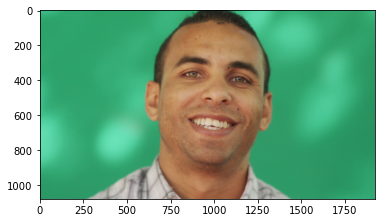

In [20]:
sample_image = cv2.imread('files/sample.png')
sample_image1 = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)
plt.imshow(sample_image1)
plt.show()

[[634  80 724 724]]
Happy


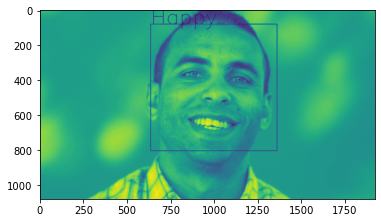

In [21]:
sample_image = cv2.imread('files/sample.png')
sample_image1 = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)
faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml').detectMultiScale(sample_image,1.2,4)
print(faces)
# Draw rectange around faces
for (x,y,w,h) in faces:
    cv2.rectangle(sample_image,(x,y),(x+w,y+h),(0,0,255),2)
    roi_gray = sample_image[y:y+w,x:x+h]
    roi_gray = cv2.resize(roi_gray,(48,48))
    image_pixels = img_to_array(roi_gray)
    image_pixels = np.expand_dims(image_pixels,axis=0)
    image_pixels /=255

    predictions = model.predict(image_pixels)
    max_index = np.argmax(predictions[0])
    emotion_detection = ('Angry','Disgust','Fear','Happy','Sad','Suprise','Neutral')
    emotion_detection = emotion_detection[max_index]


    print(emotion_detection)
    image = cv2.putText(sample_image,emotion_detection,(int(x),int(y)),cv2.FONT_HERSHEY_SIMPLEX,4,(0,0,255),2,cv2.LINE_AA)
    plt.imshow(image)